# Exercício 20

### Análise de Consumo de Energia e Emissões de CO2

https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption
Faça um join entre os dados de consumo de energia e emissões de CO2 por país/continente.

---

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [5]:
df = pd.read_csv('documents/dados_energia_simulados_ptbr.csv')

***Crie um Boxplot que compare o consumo de energias renováveis e fósseis por continente.***

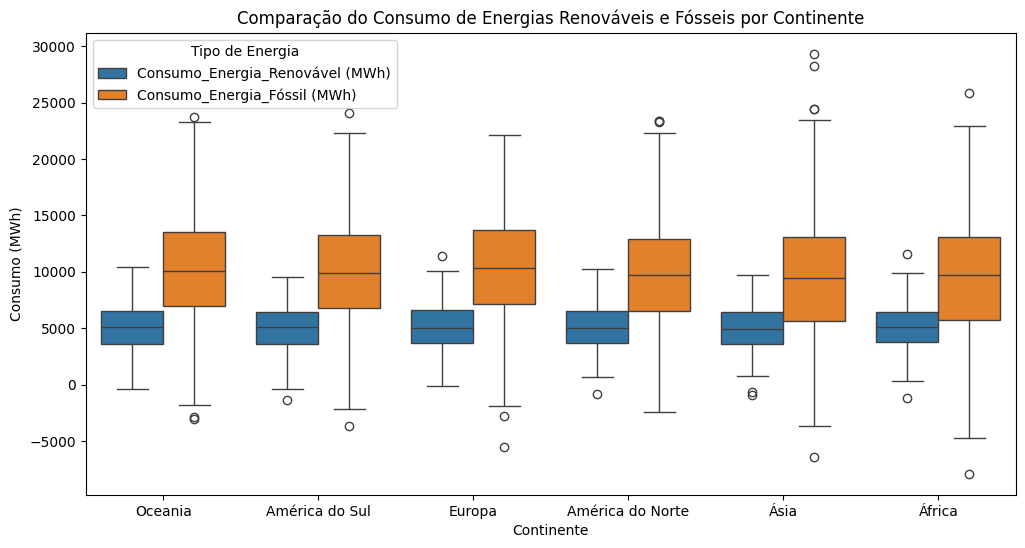

In [6]:
df_melt = pd.melt(df, id_vars=['Continente'], value_vars=['Consumo_Energia_Renovável (MWh)', 'Consumo_Energia_Fóssil (MWh)'],
                  var_name='Tipo de Energia', value_name='Consumo (MWh)')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Continente', y='Consumo (MWh)', hue='Tipo de Energia', data=df_melt)

plt.title('Comparação do Consumo de Energias Renováveis e Fósseis por Continente')
plt.xlabel('Continente')
plt.ylabel('Consumo (MWh)')

plt.legend(title='Tipo de Energia')
plt.show()

***Use gráficos de linha para mostrar a evolução do consumo de energias renováveis e fósseis e as emissões de CO2 ao longo do tempo.***

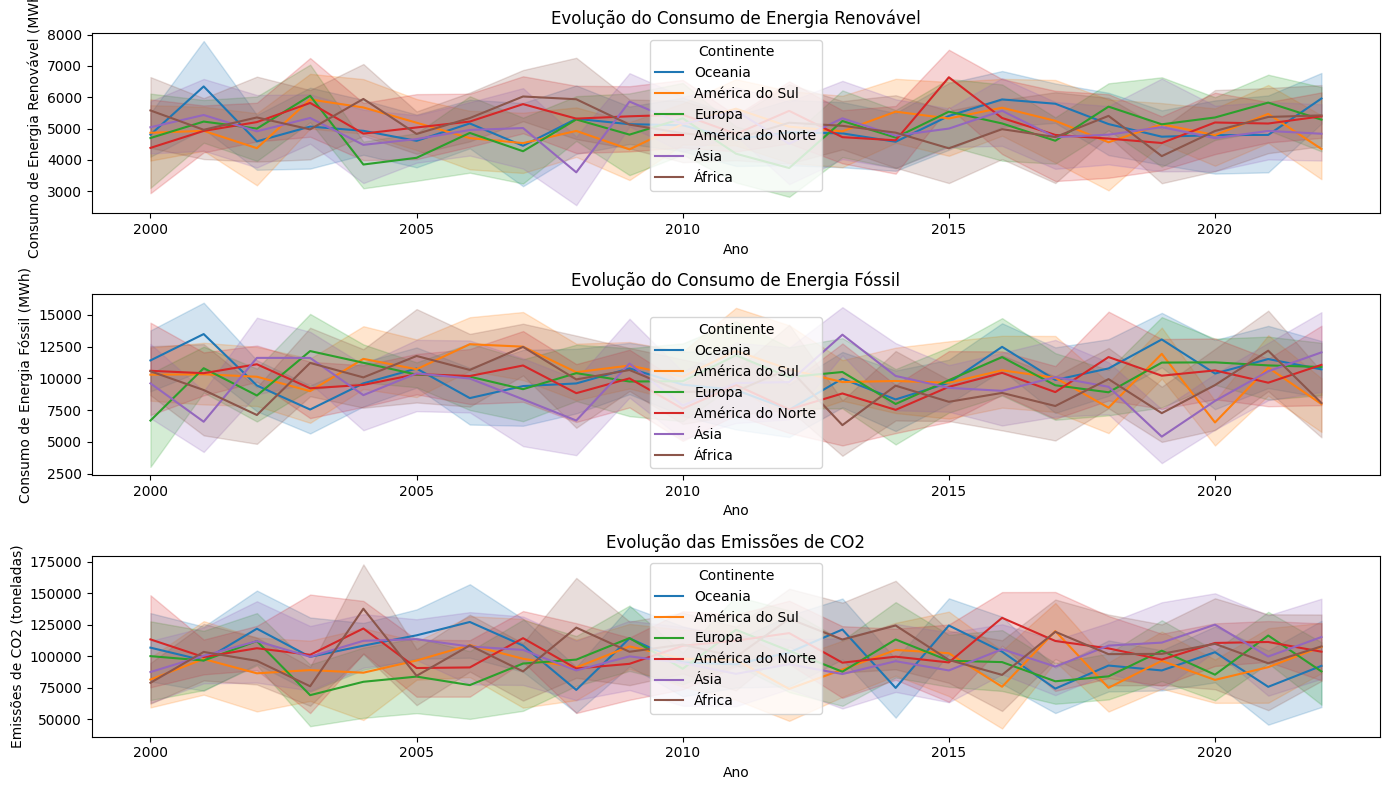

In [14]:
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
sns.lineplot(data=df, x='Ano', y='Consumo_Energia_Renovável (MWh)', hue='Continente')
plt.title('Evolução do Consumo de Energia Renovável')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia Renovável (MWh)')

plt.subplot(3, 1, 2)
sns.lineplot(data=df, x='Ano', y='Consumo_Energia_Fóssil (MWh)', hue='Continente')
plt.title('Evolução do Consumo de Energia Fóssil')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia Fóssil (MWh)')

plt.subplot(3, 1, 3)
sns.lineplot(data=df, x='Ano', y='Emissões_CO2 (toneladas)', hue='Continente')
plt.title('Evolução das Emissões de CO2')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (toneladas)')

plt.tight_layout()

plt.show()


***Visualize a contribuição dos setores (indústria, transporte, etc.) para as emissões de CO2 por continente.***

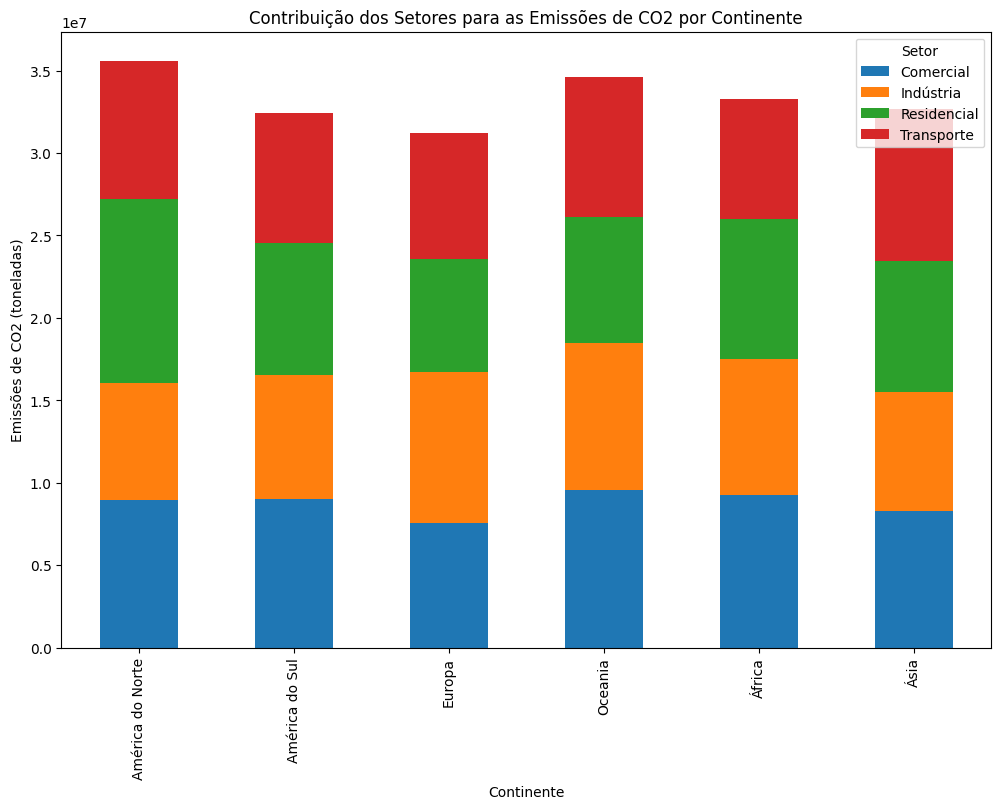

In [8]:
df_aggregated = df.groupby(['Continente', 'Setor']).sum().reset_index()

df_pivot = df_aggregated.pivot(index='Continente', columns='Setor', values='Emissões_CO2 (toneladas)')

df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Contribuição dos Setores para as Emissões de CO2 por Continente')
plt.xlabel('Continente')
plt.ylabel('Emissões de CO2 (toneladas)')
plt.legend(title='Setor')

plt.show()

***Crie gráficos de dispersão para analisar a correlação entre o consumo de energia fóssil e as emissões de CO2 por continente, incluindo uma linha de regressão.***

<Figure size 1400x1000 with 0 Axes>

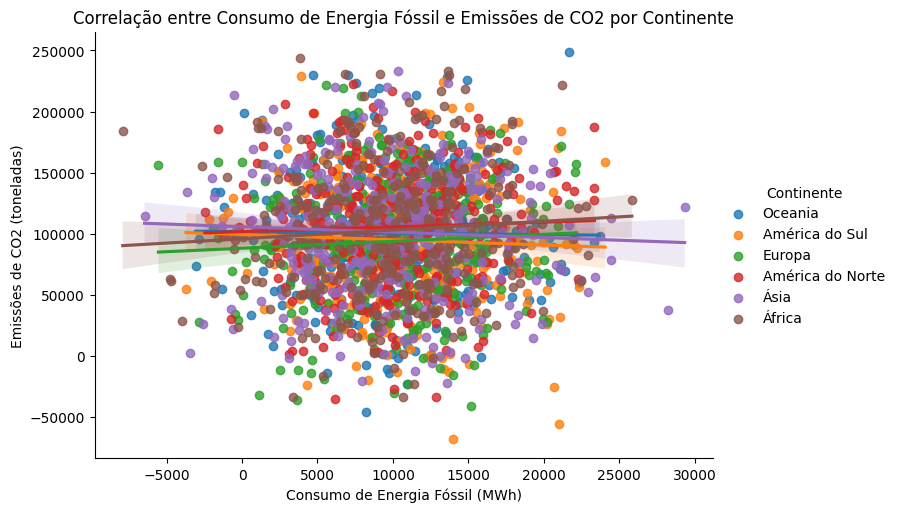

In [9]:
plt.figure(figsize=(14, 10))

sns.lmplot(data=df, x='Consumo_Energia_Fóssil (MWh)', y='Emissões_CO2 (toneladas)', hue='Continente', markers='o', aspect=1.5)

plt.title('Correlação entre Consumo de Energia Fóssil e Emissões de CO2 por Continente')
plt.xlabel('Consumo de Energia Fóssil (MWh)')
plt.ylabel('Emissões de CO2 (toneladas)')

plt.show()

***Crie gráficos interativos que permitam visualizar como o consumo energético impacta as emissões ao longo do tempo em diferentes regiões.***

In [26]:
df = df[df["Ano"] > 0]
df = df[df["Consumo_Energia_Renovável (MWh)"] >= 0]
df = df[df["Consumo_Energia_Fóssil (MWh)"] >= 0]
df = df[df["Emissões_CO2 (toneladas)"] >= 0]


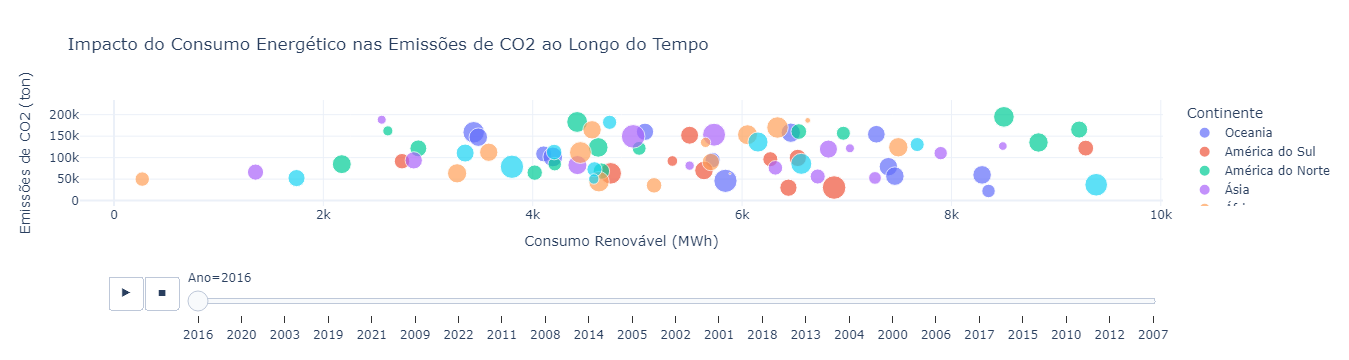

In [25]:
fig = px.scatter(
    df,
    x="Consumo_Energia_Renovável (MWh)",
    y="Emissões_CO2 (toneladas)",
    size="Consumo_Energia_Fóssil (MWh)",
    color="Continente",
    animation_frame="Ano",
    hover_name="Continente",
    title="Impacto do Consumo Energético nas Emissões de CO2 ao Longo do Tempo",
    labels={
        "Consumo_Energia_Renovável (MWh)": "Consumo Renovável (MWh)",
        "Consumo_Energia_Fóssil (MWh)": "Consumo Fóssil (MWh)",
        "Emissões_CO2 (toneladas)": "Emissões de CO2 (ton)",
        "Ano": "Ano",
    },
    template="plotly_white"
)

fig.show()


***Explique como o consumo de energia está relacionado às emissões de CO2, destacando diferenças regionais e setoriais.***

O consumo de energia está diretamente relacionado às emissões de CO2, com diferenças regionais e setoriais influenciadas pela dependência de combustíveis fósseis em setores como transporte e indústria, enquanto regiões que utilizam mais fontes renováveis tendem a emitir menos carbono.